### Need to perform data analysis on the dataset, check review lengths etc.

In [8]:
import os

def load_movie_reviews(folder):
    reviews = []
    for filename in os.listdir(folder):
        filepath = f'{folder}/{filename}'
        with open(filepath, 'r', encoding='utf-8') as file:
            review = file.read()
            reviews.append(review)
    return reviews

def remove_breaks(reviews):
    return [review.replace('<br /><br />', '') for review in reviews]

positive_reviews = load_movie_reviews('data/train/pos')
negative_reviews = load_movie_reviews('data/train/neg')

positive_reviews = remove_breaks(positive_reviews)
negative_reviews = remove_breaks(negative_reviews)

# Only use the first 3000 reviews from both
positive_reviews = positive_reviews
negative_reviews = negative_reviews

print(len(positive_reviews))
print(len(negative_reviews))

print(positive_reviews[1])

12500
12500
Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they'll be next to end up on the streets.But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home, the entertainment sets, a bathroom, pictures on the wall, a computer, and everything you once treasure to see what it's like to be homeless? That is Goddard Bolt's lesson.Mel Brooks (who directs) who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival (Jeffery Tambor) to see if he can live in the streets for thirty days without the luxuries; 

## Use spacy to Tokenize the reviews

In [9]:
import spacy
from tqdm.notebook import tqdm

def tokenize_reviews(reviews):
    nlp = spacy.load('en_core_web_lg') # , disable=['parser', 'tagger', 'ner']
    tokenized_reviews = []
    word_embeddings = []
    
    # Use nlp.pipe for efficient batch processing
    for doc in tqdm(nlp.pipe(reviews), total=len(reviews)):
        tokens = [token.text for token in doc]
        tokenized_reviews.append(tokens)
        word_embedding = [token.vector for token in doc]
        word_embeddings.append(word_embedding)
        
        
    return tokenized_reviews, word_embeddings

positive_tokenized, positive_vectors = tokenize_reviews(positive_reviews)
negative_tokenized, negative_vectors = tokenize_reviews(negative_reviews)

  0%|          | 0/12500 [00:00<?, ?it/s]

  0%|          | 0/12500 [00:00<?, ?it/s]

In [10]:
print(positive_tokenized[1])

['Homelessness', '(', 'or', 'Houselessness', 'as', 'George', 'Carlin', 'stated', ')', 'has', 'been', 'an', 'issue', 'for', 'years', 'but', 'never', 'a', 'plan', 'to', 'help', 'those', 'on', 'the', 'street', 'that', 'were', 'once', 'considered', 'human', 'who', 'did', 'everything', 'from', 'going', 'to', 'school', ',', 'work', ',', 'or', 'vote', 'for', 'the', 'matter', '.', 'Most', 'people', 'think', 'of', 'the', 'homeless', 'as', 'just', 'a', 'lost', 'cause', 'while', 'worrying', 'about', 'things', 'such', 'as', 'racism', ',', 'the', 'war', 'on', 'Iraq', ',', 'pressuring', 'kids', 'to', 'succeed', ',', 'technology', ',', 'the', 'elections', ',', 'inflation', ',', 'or', 'worrying', 'if', 'they', "'ll", 'be', 'next', 'to', 'end', 'up', 'on', 'the', 'streets', '.', 'But', 'what', 'if', 'you', 'were', 'given', 'a', 'bet', 'to', 'live', 'on', 'the', 'streets', 'for', 'a', 'month', 'without', 'the', 'luxuries', 'you', 'once', 'had', 'from', 'a', 'home', ',', 'the', 'entertainment', 'sets', '

### Find some statistics about the reviews

In [11]:
from collections import Counter
import numpy as np

def get_review_stats(tokenized_reviews):
    review_lengths = [len(review) for review in tokenized_reviews]
    print('Min review length:', min(review_lengths))
    print('Max review length:', max(review_lengths))
    print('Mean review length:', sum(review_lengths) / len(review_lengths))
    print('Median review length:', sorted(review_lengths)[len(review_lengths) // 2])
    print('Standard deviation:', np.std(review_lengths))
    # Find number of reviews with length more than 200
    print('Number of reviews with length more than 200:', len([length for length in review_lengths if length > 200]))
    print()

# Find the most common words
def get_most_common_words(tokenized_reviews):
    all_words = [word for review in tokenized_reviews for word in review]
    word_counts = Counter(all_words)
    print('Number of unique words:', len(word_counts))
    print('Most common words:', word_counts.most_common(30))
    print()

get_review_stats(positive_tokenized)
get_review_stats(negative_tokenized)


get_most_common_words(positive_tokenized)
get_most_common_words(negative_tokenized)



Min review length: 14
Max review length: 2754
Mean review length: 273.51024
Median review length: 201
Standard deviation: 208.647168145514
Number of reviews with length more than 200: 6272

Min review length: 11
Max review length: 1778
Mean review length: 268.05648
Median review length: 202
Standard deviation: 193.8392344444478
Number of reviews with length more than 200: 6330

Number of unique words: 76828
Most common words: [('the', 149838), (',', 143760), ('.', 135608), ('and', 86206), ('a', 80023), ('of', 75863), ('to', 65909), ('is', 57986), ('in', 46934), ('it', 38151), ('I', 37525), ('that', 34461), ("'s", 32022), ('"', 30418), ('this', 27277), ('-', 25917), ('as', 24457), ('was', 22595), ('with', 22538), ('The', 22092), ('for', 21399), ('film', 20571), ('movie', 18714), ('(', 17382), ('but', 17038), (')', 16970), ('on', 16412), ('his', 16317), ('are', 15014), ('you', 14914)]

Number of unique words: 76500
Most common words: [('the', 140017), ('.', 135849), (',', 131620), ('a', 

### Generate word embeddings

In [12]:
print(len(positive_vectors[0]))
print(len(positive_tokenized[0]))

165
165


## Check score distribution

endpoint count 9832
endpoint percentage 39.328
Counter({1: 5100, 8: 4732, 6: 3009, 4: 2696, 5: 2496, 3: 2420, 2: 2284, 7: 2263})
Counter({1: 5022, 8: 4999, 6: 2850, 4: 2635, 3: 2541, 7: 2344, 5: 2307, 2: 2302})


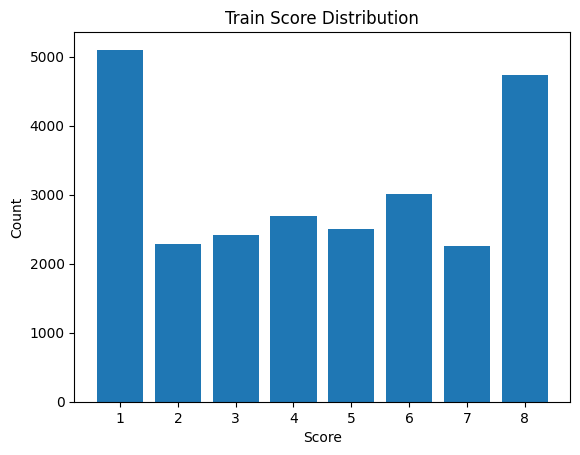

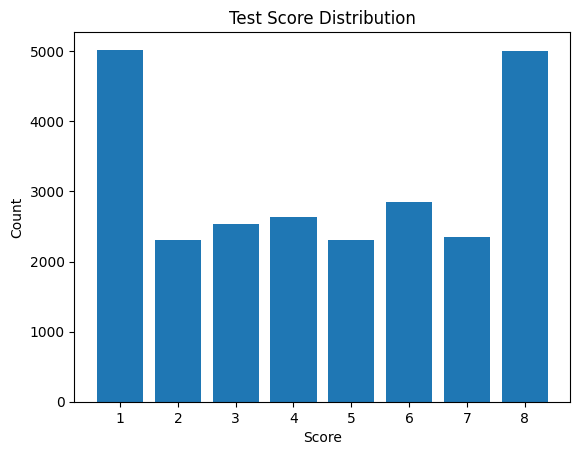

In [13]:
from utils import load_combined_reviews
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

pos_train, pos_train_scores = load_combined_reviews('train', 'pos')
neg_train, neg_train_scores = load_combined_reviews('train', 'neg')
pos_test, pos_test_scores = load_combined_reviews('test', 'pos')
neg_test, neg_test_scores = load_combined_reviews('test', 'neg')

train_scores = np.concatenate([pos_train_scores, neg_train_scores])
test_scores = np.concatenate([pos_test_scores, neg_test_scores])

train_score_counts = Counter(train_scores)
test_score_counts = Counter(test_scores)

# Check how many of the reviews are in the endpoints
print('endpoint count', train_score_counts[1] + train_score_counts[8])
print('endpoint percentage', (train_score_counts[1] + train_score_counts[8]) / len(train_scores) * 100)

# Display the score distribution in a bar plot
def plot_score_distribution(score_counts, title):
    plt.bar(score_counts.keys(), score_counts.values())
    plt.title(title)
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.show()
    

print(train_score_counts)
print(test_score_counts)

plot_score_distribution(train_score_counts, 'Train Score Distribution')
plot_score_distribution(test_score_counts, 'Test Score Distribution')




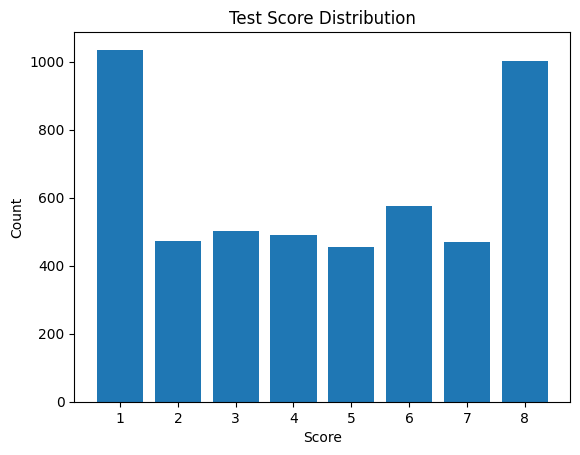

In [14]:
test_scores = test_scores[10000:15000]

test_score_counts = Counter(test_scores)

plot_score_distribution(test_score_counts, 'Test Score Distribution')